In [1]:
from cluster import kmeans, silhouette, utils
from scipy.spatial.distance import cdist
import numpy as np
import random

In [2]:
# Create data points and clusters
N = 100
mat, labels = utils.make_clusters(n = N, k = 3)

In [3]:
# Split the data into training and test sets
idx = list(range(0,N))
train_idx = random.sample(idx, 80) # Training set
test_idx = list(set(idx) - set(train_idx)) # Testing set

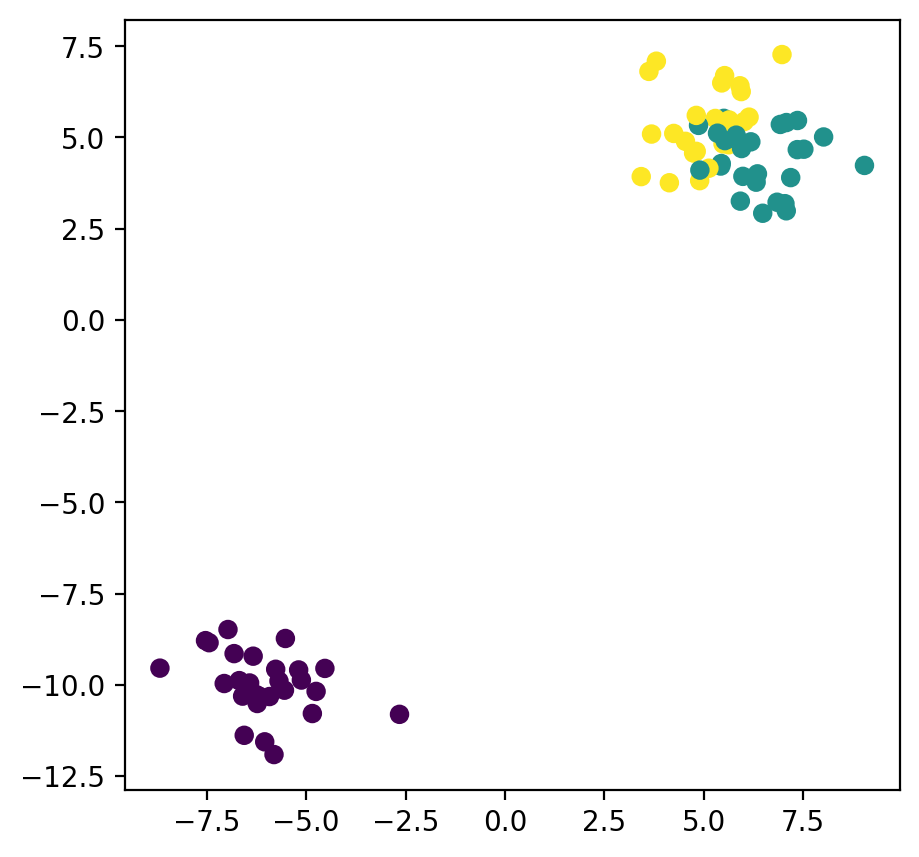

In [4]:
# Initialize k means and train on training data
mat_train = mat[train_idx, :]
labels_train = labels[train_idx]
utils.plot_clusters(mat_train, labels_train)

In [5]:
# Initialize k means and fit on training data
km = kmeans.KMeans(k = 3)
km.fit(mat_train)

Fitting 80 observations to 3 clusters


In [6]:
# Test on testing set
mat_test = mat[test_idx, :]
test_labels_pred = km.predict(mat_test)
test_labels_true = labels[test_idx]

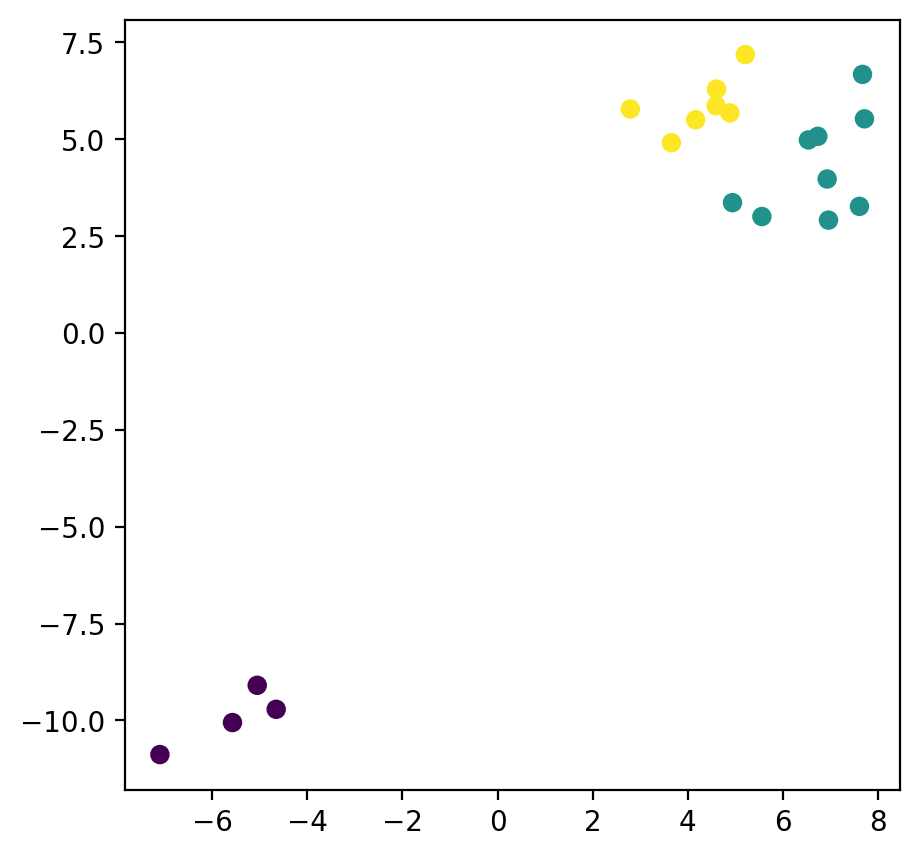

In [7]:
utils.plot_clusters(mat_test, test_labels_true)

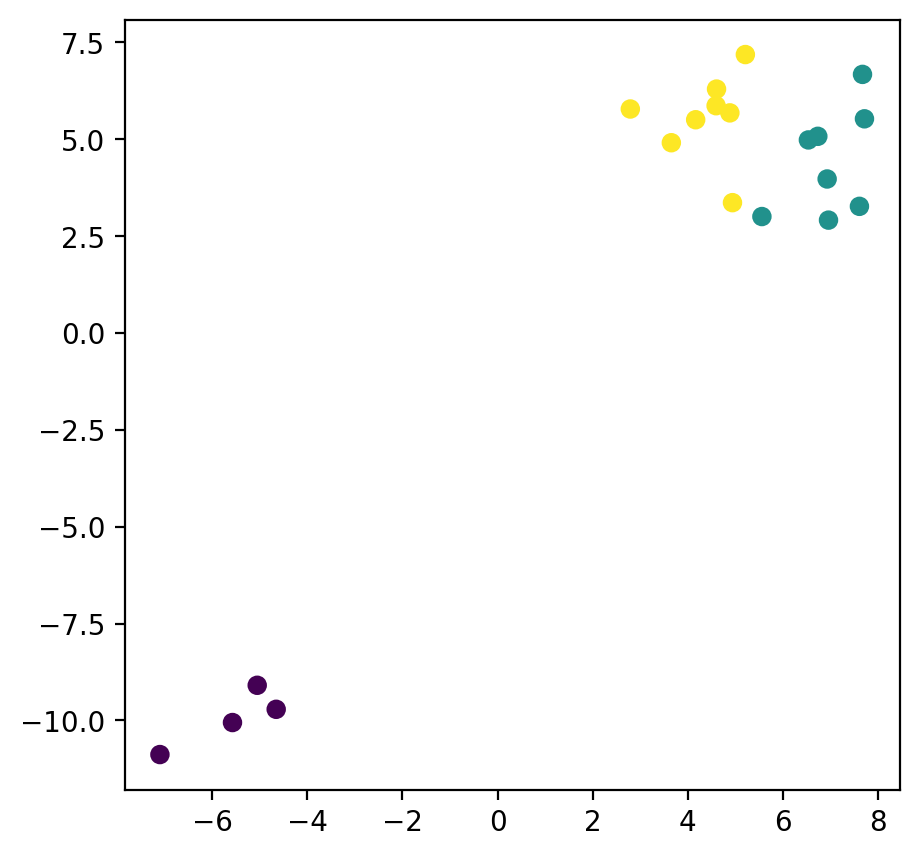

In [8]:
utils.plot_clusters(mat_test, test_labels_pred)

In [17]:
# Inputs
X = mat_test
y = test_labels_pred
# -----

# Early function stuff
num_obs = X.shape[0] # Number of observations in X 
cluster_list = np.unique(y)
num_clusters = len(cluster_list) # unique clusters

# Initialize array to store silhouette scores
sil_scores = np.zeros(num_obs)

pairwise_dists = cdist(X, X, metric = "euclidean")

In [46]:
# loop through observations
for obs in range(0, num_obs):
    current_cluster = y[obs]
    cluster_size = len(y[y == current_cluster])

    # If/else check switch for cluster size
    if cluster_size == 1:
        sil_scores[obs] = 0
    else:
        same_cluster_dists = pairwise_dists[y == current_cluster][:,obs]
        a = np.mean(same_cluster_dists)
        
        #print(a)
        # Calculate b
       
        # For each cluster not current cluster
        other_clusters = np.delete(cluster_list, current_cluster)
        b = np.inf
        for c in other_clusters:
            other_cluster_dists = pairwise_dists[y == c][:, obs]
            _b = np.mean(other_cluster_dists)
            b = min(b, _b)
        print(b)
        sil_scores[obs] = (b-a)/max(a,b)

        

17.44676137438212
17.76516646197195
18.535877426590048
20.068224635163386
3.535406143072208
3.8473674535761977
3.220059093078895
3.636696248510911
4.120948612968593
2.53019444820981
2.9485775890197767
2.681855440927738
2.5129544933936048
3.5883159221788032
3.4681751348181744
2.756613770070984
3.273033765596801
4.581294188066719
3.276407043642074
3.064310711596968


In [47]:
sil_scores

array([0.93483821, 0.93770372, 0.9486318 , 0.91079079, 0.5202331 ,
       0.54363027, 0.59380169, 0.33618439, 0.59086923, 0.45750343,
       0.26692075, 0.49491685, 0.04754042, 0.60814707, 0.44341197,
       0.58441383, 0.63326025, 0.60592798, 0.67004496, 0.65472776])

In [48]:
np.mean(sil_scores)

0.5891749219230276

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y)

0.5282928755732434